<a href="https://colab.research.google.com/github/fdavidsen/Braincore-Intern/blob/main/Braincore_Intern_1_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalasi YOLO dan Persiapan Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

BASE_PATH = '/content/drive/MyDrive/Braincore Intern/Week 1/'
DATA_PATH = BASE_PATH + 'food-detection-dataset/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Pelatihan Model

In [ ]:
!pip install ultralytics

In [ ]:
!git clone https://github.com/anushkaspatil/Food-Detection.git

In [ ]:
# import YOLO model
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.pt')

# Train the model
model.train(data=DATA_PATH + 'yolo.yaml', imgsz=224, epochs=5)

In [ ]:
model = YOLO('/content/runs/detect/train5/weights/last.pt')
model.train(data=DATA_PATH + 'yolo.yaml', imgsz=224, epochs=25)

# Evaluasi Model


image 1/1 /content/drive/MyDrive/Braincore Intern/Week 1/food-detection-dataset/images/test/10_jpg.rf.cb39dd36b54d82638b4d6e54ab5a7df1.jpg: 640x640 2 broccolis, 1 dining table, 471.7ms
Speed: 11.0ms preprocess, 471.7ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)


array([[[200, 216, 233],
        [193, 209, 226],
        [193, 209, 226],
        ...,
        [188, 209, 231],
        [188, 209, 230],
        [188, 209, 230]],

       [[205, 221, 238],
        [198, 214, 231],
        [198, 214, 231],
        ...,
        [194, 215, 237],
        [194, 215, 236],
        [194, 215, 236]],

       [[209, 225, 242],
        [204, 220, 237],
        [203, 219, 236],
        ...,
        [203, 222, 243],
        [203, 222, 243],
        [203, 222, 243]],

       ...,

       [[198, 227, 248],
        [214, 244, 255],
        [220, 249, 255],
        ...,
        [194, 223, 254],
        [195, 223, 255],
        [196, 225, 255]],

       [[190, 210, 227],
        [206, 227, 242],
        [210, 230, 247],
        ...,
        [145, 183, 207],
        [147, 184, 210],
        [147, 185, 209]],

       [[171, 188, 201],
        [189, 206, 219],
        [194, 211, 224],
        ...,
        [104, 147, 168],
        [102, 145, 166],
        [102, 145, 166]]], dtype=uint8)
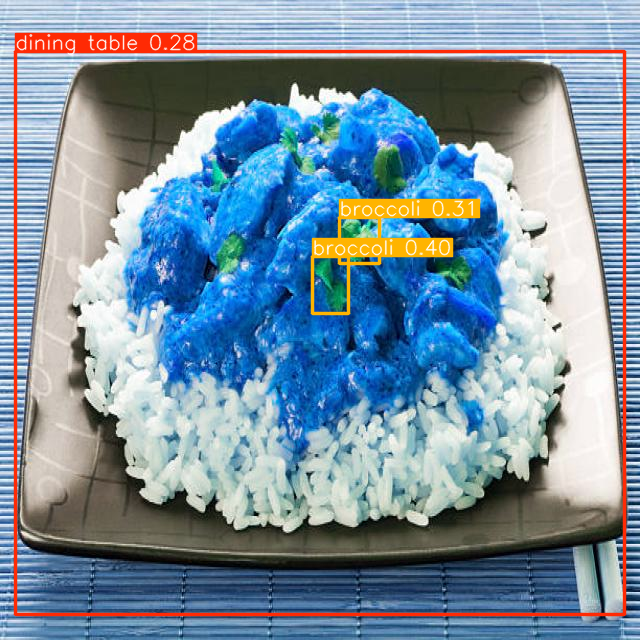

In [ ]:
results = model(DATA_PATH + 'images/test/10_jpg.rf.cb39dd36b54d82638b4d6e54ab5a7df1.jpg')
results[0].plot()


image 1/1 /content/drive/MyDrive/Braincore Intern/Week 1/food-detection-dataset/images/test/10_jpg.rf.cb39dd36b54d82638b4d6e54ab5a7df1.jpg: 224x224 1 Chicken Gravy, 74.4ms
Speed: 1.4ms preprocess, 74.4ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 224)


array([[[200, 216, 233],
        [193, 209, 226],
        [193, 209, 226],
        ...,
        [188, 209, 231],
        [188, 209, 230],
        [188, 209, 230]],

       [[205, 221, 238],
        [198, 214, 231],
        [198, 214, 231],
        ...,
        [194, 215, 237],
        [194, 215, 236],
        [194, 215, 236]],

       [[209, 225, 242],
        [204, 220, 237],
        [203, 219, 236],
        ...,
        [203, 222, 243],
        [203, 222, 243],
        [203, 222, 243]],

       ...,

       [[198, 227, 248],
        [214, 244, 255],
        [220, 249, 255],
        ...,
        [194, 223, 254],
        [195, 223, 255],
        [196, 225, 255]],

       [[190, 210, 227],
        [206, 227, 242],
        [210, 230, 247],
        ...,
        [145, 183, 207],
        [147, 184, 210],
        [147, 185, 209]],

       [[171, 188, 201],
        [189, 206, 219],
        [194, 211, 224],
        ...,
        [104, 147, 168],
        [102, 145, 166],
        [102, 145, 166]]], dtype=uint8)
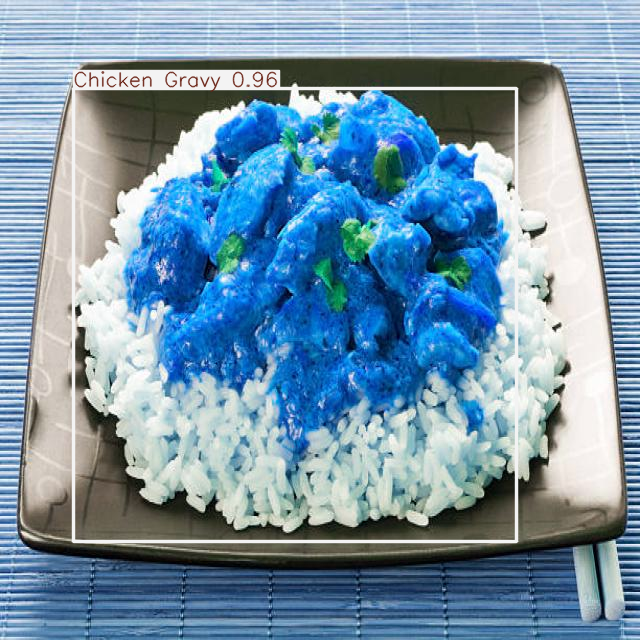

In [ ]:
results = model(DATA_PATH + 'images/test/10_jpg.rf.cb39dd36b54d82638b4d6e54ab5a7df1.jpg')
results[0].plot()

In [ ]:
metrics = model.val()

Ultralytics YOLOv8.2.79 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)


val: Scanning /content/drive/MyDrive/Braincore Intern/Week 1/food-detection-dataset/labels/valid.cache... 65 images, 1 backgrounds, 0 corrupt: 100%|██████████| 65/65 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 105, len(boxes) = 114. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.11s/it]


                   all         65        114       0.94      0.877      0.968      0.774
                 Apple          6         15       0.96      0.933      0.991      0.745
              Chapathi          7          7      0.979          1      0.995      0.804
         Chicken Gravy          6          6       0.98          1      0.995      0.661
                 Fries          6          6      0.835      0.847      0.948      0.557
                  Idli          6         14      0.889       0.57      0.889      0.698
                 Pizza          6          6      0.984          1      0.995      0.762
                  Rice          7          7          1      0.909      0.995      0.904
                  Soda          6          7      0.874      0.714      0.944      0.822
                  Vada          6         36       0.96       0.67      0.902      0.701
                banana          1          1      0.909          1      0.995      0.995
                burge

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

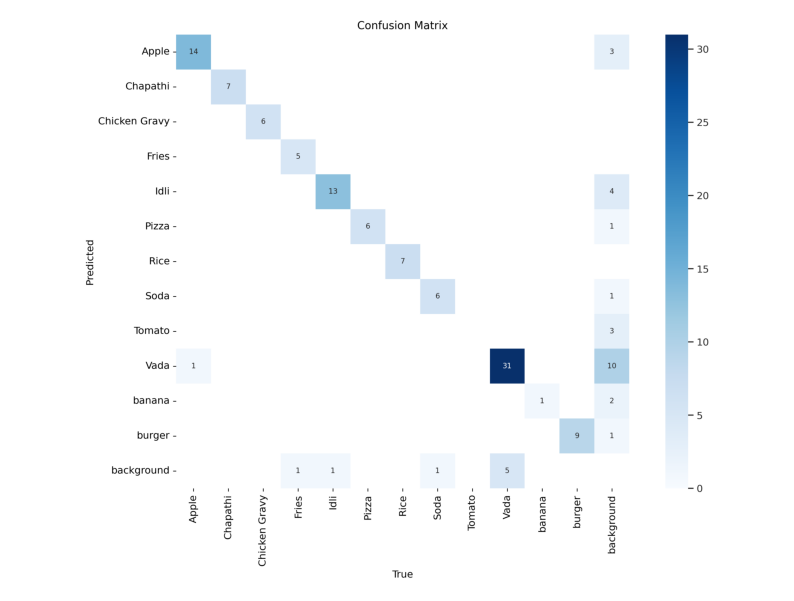

In [ ]:
img_path = BASE_PATH + 'YOLO_train/confusion_matrix.png'
img = mpimg.imread(img_path)
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

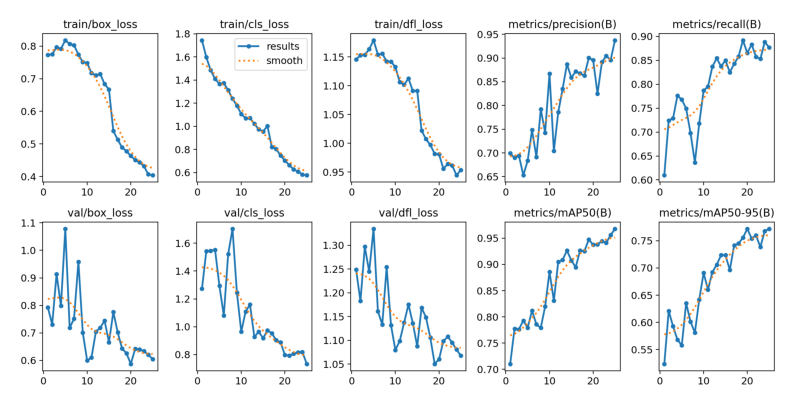

In [ ]:
img_path = BASE_PATH + 'YOLO_train/results.png'
img = mpimg.imread(img_path)
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

# Implementasi Model

## CLI

In [ ]:
!yolo task=detect mode=predict imgsz=224 \
  model='/content/drive/MyDrive/Braincore Intern/Week 1/YOLO_train/weights/best.pt' \
  source='/content/drive/MyDrive/Braincore Intern/Week 1/food-detection-dataset/images/test/10_jpg.rf.cb39dd36b54d82638b4d6e54ab5a7df1.jpg'

Ultralytics YOLOv8.2.79 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,007,988 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/Braincore Intern/Week 1/food-detection-dataset/images/test/10_jpg.rf.cb39dd36b54d82638b4d6e54ab5a7df1.jpg: 224x224 1 Chicken Gravy, 83.9ms
Speed: 1.3ms preprocess, 83.9ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


## Flask

In [ ]:
!pip install Flask pyngrok

In [ ]:
!ngrok config add-authtoken <AUTHTOKEN>

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from flask import Flask, request, jsonify, render_template
from ultralytics import YOLO
import os

# Initialize the Flask app
app = Flask(__name__)

# Load the YOLO model
model = YOLO(BASE_PATH + 'YOLO_train/weights/best.pt')

# Ensure 'uploads' directory exists
if not os.path.exists('uploads'):
    os.makedirs('uploads')

# Route for the home page
@app.route('/')
def home():
    return jsonify({'message': 'Hello World!'})

# Route to handle image uploads and inference
@app.route('/predict', methods=['POST'])
def predict():
    if 'file' not in request.files:
        return jsonify({'error': 'No file uploaded'}), 400

    file = request.files['file']
    if file.filename == '':
        return jsonify({'error': 'No file selected'}), 400

    # Save the file
    filepath = os.path.join('uploads', file.filename)
    file.save(filepath)

    # Run inference using the YOLO model
    try:
        results = model(filepath)  # Perform inference
        predictions = []
        for pred in results[0].boxes:
            predictions.append({
                'class': model.names[int(pred.cls)],  # Get class name
                'confidence': float(pred.conf),  # Confidence score
                'bbox': pred.xywh.tolist()  # Bounding box (center x, center y, width, height)
            })
    except Exception as e:
        return jsonify({'error': str(e)}), 500
    finally:
        # Optionally remove the uploaded file after processing
        os.remove(filepath)

    # Return the result as JSON
    return jsonify({'predictions': predictions}), 200

In [ ]:
from pyngrok import ngrok

# Run Flask app
http_tunnel = ngrok.connect(5000)
print("Public URL:", http_tunnel.public_url)

app.run()

Public URL: https://5792-34-122-182-13.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit



image 1/1 /content/uploads/Crack_0008.jpg: 224x192 (no detections), 42.2ms
Speed: 1.3ms preprocess, 42.2ms inference, 0.6ms postprocess per image at shape (1, 3, 224, 192)


INFO:werkzeug:127.0.0.1 - - [20/Aug/2024 12:59:07] "POST /predict HTTP/1.1" 200 -



image 1/1 /content/uploads/360_F_65706597_uNm2SwlPIuNUDuMwo6stBd81e25Y8K8s.jpg: 160x224 5 Apples, 2 bananas, 53.4ms
Speed: 1.5ms preprocess, 53.4ms inference, 1.7ms postprocess per image at shape (1, 3, 160, 224)


INFO:werkzeug:127.0.0.1 - - [20/Aug/2024 13:03:28] "POST /predict HTTP/1.1" 200 -
